In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("steam.csv",encoding= 'unicode_escape')
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,124534.0,3339.0,17612.0,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,3318.0,633.0,277.0,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0.0,3416.0,398.0,187.0,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,1273.0,267.0,258.0,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0.0,5250.0,288.0,624.0,415,5000000-10000000,3.99


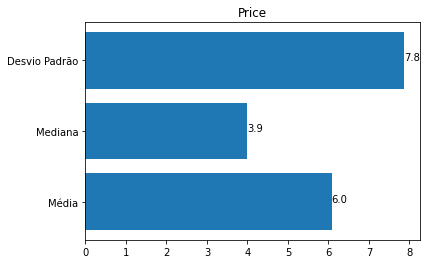

In [ ]:
x = ["Média", "Mediana", "Desvio Padrão"]
y = [np.mean(df['price']), np.nanmedian(df['price']), np.std(df['price'])]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value)[:3])
plt.title("Price")
plt.show()

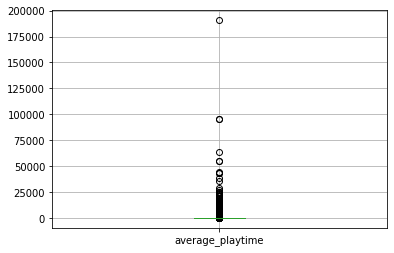

In [ ]:
df.boxplot(column="average_playtime")

In [ ]:
df["average_playtime"].describe()

count     27075.000000
mean        149.804949
std        1827.038141
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      190625.000000
Name: average_playtime, dtype: float64

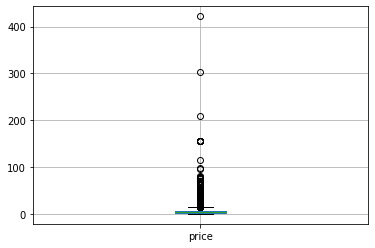

In [ ]:
df.boxplot(column="price")

In [ ]:
df["price"].describe()

count    27074.000000
mean         6.078226
std          7.875066
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64